<a href="https://colab.research.google.com/github/40423105/ML/blob/main/LSTM_prediction_z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [6]:
dataset_train = pd.read_csv('test.csv')
training_set = dataset_train.iloc[:,1:2]
training_set

,Z
0,971.77
1,970.76
2,970.21
3,969.15
4,967.52
...,...
505,939.69
506,939.75
507,939.99
508,940.63


In [5]:
dataset_train.head()

,Date,Z,T1,T2,T3,T4,T5,T6,T7,T8
0,2020/9/8 08:46,971.77,20.26,22.74,22.57,22.37,23.12,23.40,23.10,22.72
1,2020/9/8 08:46,970.76,20.26,22.66,22.57,22.37,23.12,23.40,23.14,22.72
2,2020/9/8 08:47,970.21,20.26,22.66,22.61,22.37,23.12,23.40,23.34,22.72
3,2020/9/8 08:47,969.15,20.31,22.66,22.70,22.37,23.12,23.40,23.73,22.72
4,2020/9/8 08:48,967.52,20.35,22.74,22.83,22.41,23.16,23.45,24.26,22.72


In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
x_train = []
y_train = []
for i in range(60, 510):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
x_train

array([[[1.        ],
        [0.97785088],
        [0.96578947],
        ...,
        [0.54539474],
        [0.5502193 ],
        [0.56096491]],

       [[0.97785088],
        [0.96578947],
        [0.94254386],
        ...,
        [0.5502193 ],
        [0.56096491],
        [0.65482456]],

       [[0.96578947],
        [0.94254386],
        [0.90679825],
        ...,
        [0.56096491],
        [0.65482456],
        [0.64561404]],

       ...,

       [[0.44166667],
        [0.45131579],
        [0.45087719],
        ...,
        [0.2879386 ],
        [0.29649123],
        [0.29780702]],

       [[0.45131579],
        [0.45087719],
        [0.53333333],
        ...,
        [0.29649123],
        [0.29780702],
        [0.30307018]],

       [[0.45087719],
        [0.53333333],
        [0.52390351],
        ...,
        [0.29780702],
        [0.30307018],
        [0.31710526]]])

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
15/15 [==============================] - 11s 140ms/step - loss: 0.0311
Epoch 2/100
15/15 [==============================] - 2s 144ms/step - loss: 0.0123
Epoch 3/100
15/15 [==============================] - 2s 143ms/step - loss: 0.0128
Epoch 4/100
15/15 [==============================] - 2s 142ms/step - loss: 0.0095
Epoch 5/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0078
Epoch 6/100
15/15 [==============================] - 2s 141ms/step - loss: 0.0065
Epoch 7/100
15/15 [==============================] - 2s 141ms/step - loss: 0.0054
Epoch 8/100
15/15 [==============================] - 2s 137ms/step - loss: 0.0043
Epoch 9/100
15/15 [==============================] - 2s 138ms/step - loss: 0.0036
Epoch 10/100
15/15 [==============================] - 2s 138ms/step - loss: 0.0033
Epoch 11/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0031
Epoch 12/100
15/15 [==============================] - 2s 139ms/step - loss: 0.0035
Epoch 13/100

In [18]:
dataset_test = pd.read_csv('test_z.csv')
real_z = dataset_test.iloc[:,1:2].values

In [21]:
dataset_total = pd.concat((dataset_train['Z'], dataset_test['Z']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,510):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
predicted_z = regressor.predict(x_test)
predicted_z = sc.inverse_transform(predicted_z)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


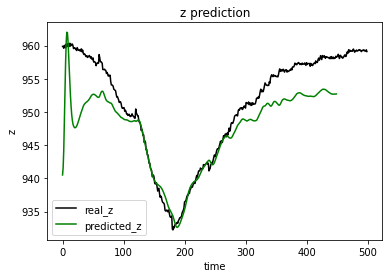

In [22]:
plt.plot(real_z, color = 'black', label = 'real_z')
plt.plot(predicted_z, color = 'green', label = 'predicted_z')
plt.title('z prediction')
plt.xlabel('time')
plt.ylabel('z')
plt.legend()
plt.show()